<a href="https://colab.research.google.com/github/ccopenh1/personal-projects/blob/main/3156FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cameron Coepnahver

Utils


In [244]:
from typing import List, Dict, Tuple, Callable
import os
import gc
import traceback
import warnings
from pdb import set_trace

import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix



# Exploratory Data Analysis

In [245]:
mh = pd.read_csv('survey.csv')

In [246]:
mh.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [247]:
mh.shape

(1259, 27)

In [248]:
mh.describe()

,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


In [249]:
mh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [250]:
mh.isna().sum()

,0
Timestamp,0
Age,0
Gender,0
Country,0
state,515
self_employed,18
family_history,0
treatment,0
work_interfere,264
no_employees,0


In [251]:
print(mh['Country'].unique())

['United States' 'Canada' 'United Kingdom' 'Bulgaria' 'France' 'Portugal'
 'Netherlands' 'Switzerland' 'Poland' 'Australia' 'Germany' 'Russia'
 'Mexico' 'Brazil' 'Slovenia' 'Costa Rica' 'Austria' 'Ireland' 'India'
 'South Africa' 'Italy' 'Sweden' 'Colombia' 'Latvia' 'Romania' 'Belgium'
 'New Zealand' 'Zimbabwe' 'Spain' 'Finland' 'Uruguay' 'Israel'
 'Bosnia and Herzegovina' 'Hungary' 'Singapore' 'Japan' 'Nigeria'
 'Croatia' 'Norway' 'Thailand' 'Denmark' 'Bahamas, The' 'Greece' 'Moldova'
 'Georgia' 'China' 'Czech Republic' 'Philippines']


In [252]:
print(mh['Age'].describe())
print(mh['Age'].value_counts())

count    1.259000e+03
mean     7.942815e+07
std      2.818299e+09
min     -1.726000e+03
25%      2.700000e+01
50%      3.100000e+01
75%      3.600000e+01
max      1.000000e+11
Name: Age, dtype: float64
Age
 29             85
 32             82
 26             75
 27             71
 33             70
 28             68
 31             67
 34             65
 30             63
 25             61
 35             55
 23             51
 24             46
 37             43
 38             39
 36             37
 40             33
 39             33
 43             28
 22             21
 41             21
 42             20
 21             16
 45             12
 46             12
 44             11
 19              9
 18              7
 48              6
 50              6
 20              6
 51              5
 49              4
 56              4
 57              3
 54              3
 55              3
 47              2
 60              2
 99999999999     1
 5               1
-1             

In [253]:
mh['Age'] = pd.to_numeric(mh['Age'], errors='coerce')
mh['Age'].fillna(mh['Age'].median(), inplace=True)
mh = mh[(mh['Age'] >= 18) & (mh['Age'] <= 100)]  #keep ages between 18 and 100

<ipython-input-253-345c9ae5d987>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  mh['Age'].fillna(mh['Age'].median(), inplace=True)


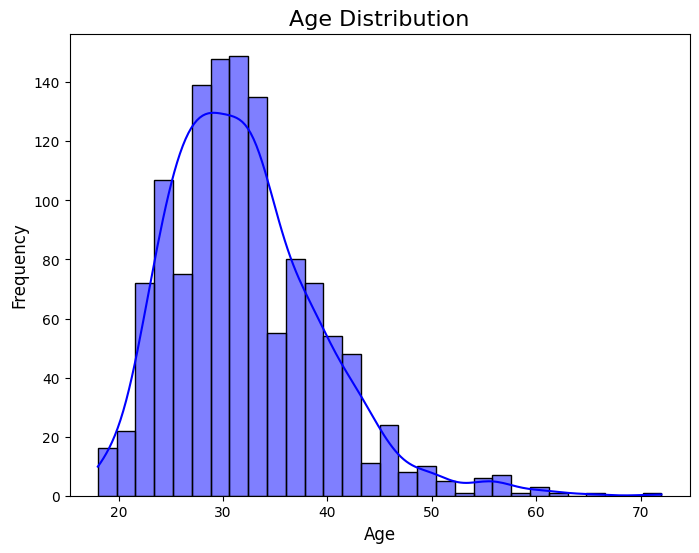

In [254]:
plt.figure(figsize=(8, 6))
sns.histplot(mh['Age'], bins=30, kde=True, color='blue')
plt.title('Age Distribution', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

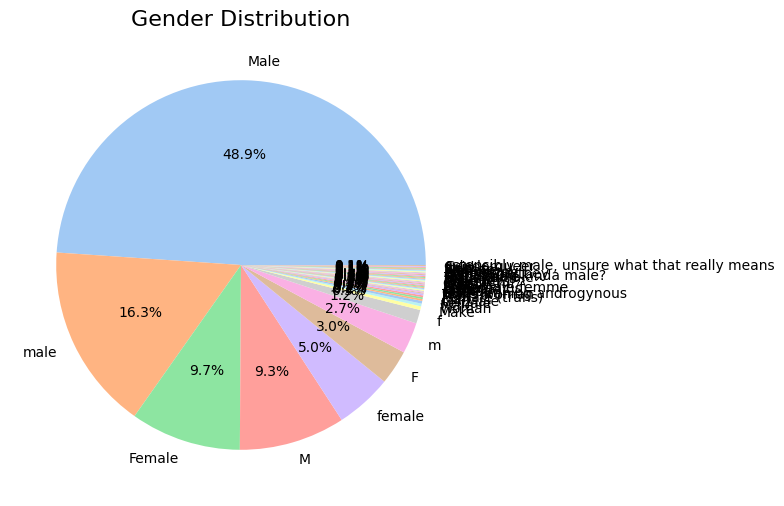

In [255]:
plt.figure(figsize=(6, 6))
gender_counts = mh['Gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Gender Distribution', fontsize=16)
plt.show()

In [256]:
print(mh['Gender'].unique())

['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning androgynous' 'Male '
 'Man' 'Trans woman' 'msle' 'Neuter' 'Female (trans)' 'queer'
 'Female (cis)' 'Mail' 'cis male' 'Malr' 'femail' 'Cis Man'
 'ostensibly male, unsure what that really means']


In [257]:
gender_mapping = {
    # Male responses
    'Male': 'Male', 'M': 'Male', 'male': 'Male', 'm': 'Male', 'Male-ish': 'Male',
    'maile': 'Male', 'Cis Male': 'Male', 'Male (CIS)': 'Male', 'Mal': 'Male',
    'Make': 'Male', 'Man': 'Male', 'msle': 'Male', 'cis male': 'Male', 'Malr': 'Male',
    'Mail': 'Male', 'Guy (-ish) ^_^': 'Male',

    # Female responses
    'Female': 'Female', 'F': 'Female', 'female': 'Female', 'f': 'Female',
    'Cis Female': 'Female', 'Femake': 'Female', 'woman': 'Female', 'Woman': 'Female',
    'Female ': 'Female', 'cis-female/femme': 'Female', 'Female (cis)': 'Female',
    'femail': 'Female',

    # Non-Binary/Other responses
    'Trans-female': 'Non-Binary/Other', 'something kinda male?': 'Non-Binary/Other',
    'queer/she/they': 'Non-Binary/Other', 'non-binary': 'Non-Binary/Other',
    'fluid': 'Non-Binary/Other', 'Genderqueer': 'Non-Binary/Other',
    'Androgyne': 'Non-Binary/Other', 'Agender': 'Non-Binary/Other',
    'male leaning androgynous': 'Non-Binary/Other', 'Trans woman': 'Non-Binary/Other',
    'Neuter': 'Non-Binary/Other', 'Female (trans)': 'Non-Binary/Other',
    'queer': 'Non-Binary/Other', 'ostensibly male, unsure what that really means': 'Non-Binary/Other',
    'Nah': 'Non-Binary/Other', 'Enby': 'Non-Binary/Other'
}

mh['Gender'] = mh['Gender'].map(lambda x: gender_mapping.get(x.strip(), 'Non-Binary/Other'))

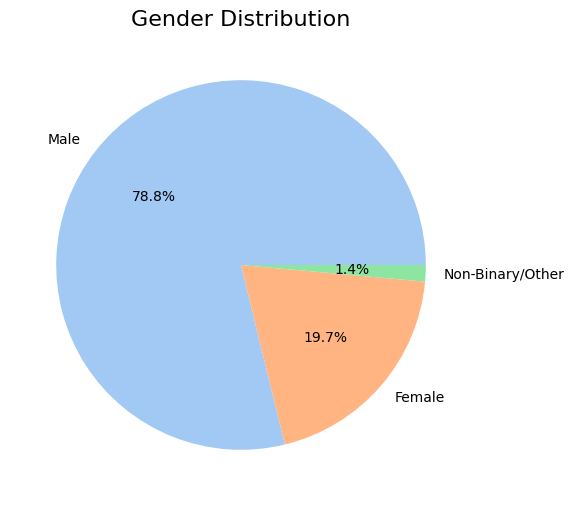

In [258]:
plt.figure(figsize=(6, 6))
gender_counts = mh['Gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Gender Distribution', fontsize=16)
plt.show()

<ipython-input-259-5d1ff9a9064f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=mh, x='treatment', palette='coolwarm')


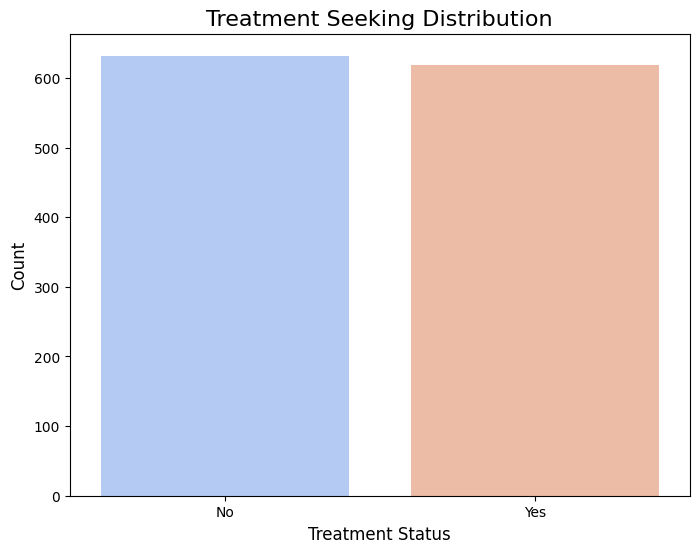

In [259]:
plt.figure(figsize=(8, 6))
sns.countplot(data=mh, x='treatment', palette='coolwarm')
plt.title('Treatment Seeking Distribution', fontsize=16)
plt.xlabel('Treatment Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

<ipython-input-260-70b80872e367>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=mh, x='leave', y='mental_vs_physical', palette='muted')


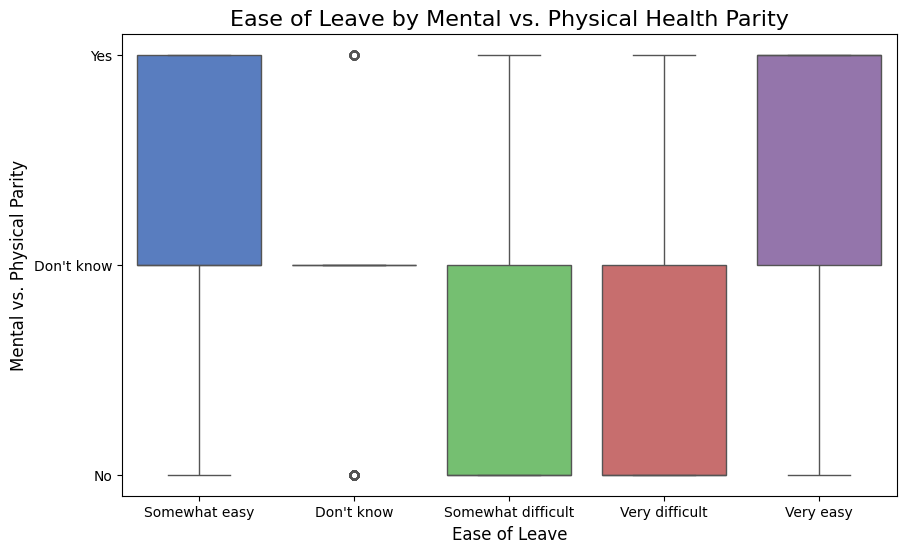

In [260]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=mh, x='leave', y='mental_vs_physical', palette='muted')
plt.title('Ease of Leave by Mental vs. Physical Health Parity', fontsize=16)
plt.xlabel('Ease of Leave', fontsize=12)
plt.ylabel('Mental vs. Physical Parity', fontsize=12)
plt.show()


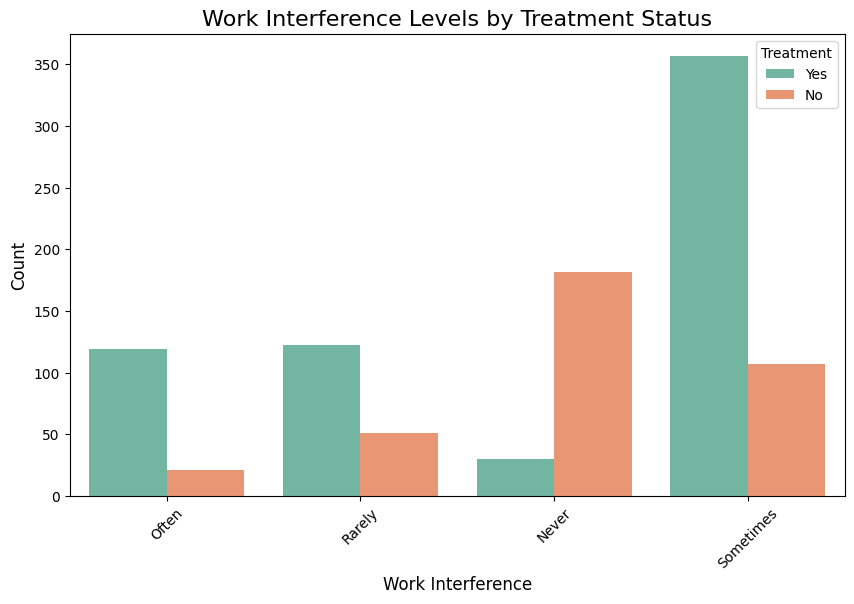

In [261]:
plt.figure(figsize=(10, 6))
sns.countplot(data=mh, x='work_interfere', hue='treatment', palette='Set2')
plt.title('Work Interference Levels by Treatment Status', fontsize=16)
plt.xlabel('Work Interference', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Treatment')
plt.show()


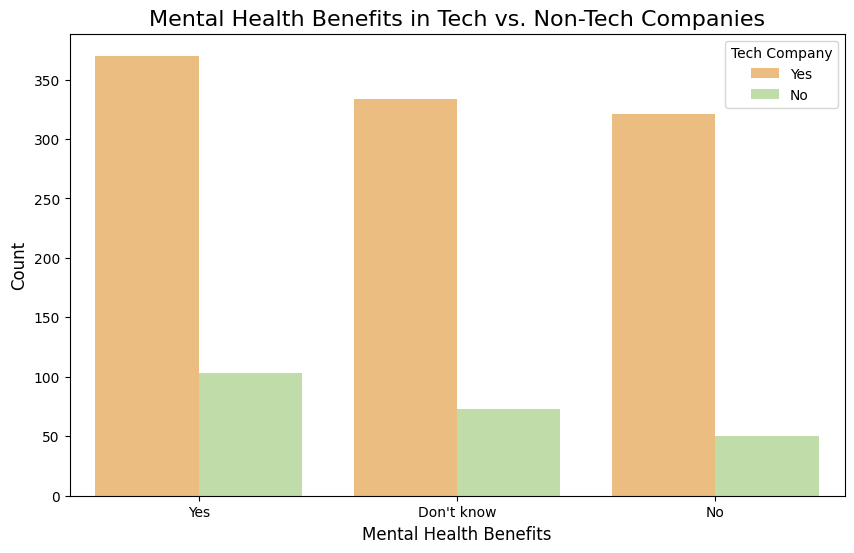

In [262]:
plt.figure(figsize=(10, 6))
sns.countplot(data=mh, x='benefits', hue='tech_company', palette='Spectral')
plt.title('Mental Health Benefits in Tech vs. Non-Tech Companies', fontsize=16)
plt.xlabel('Mental Health Benefits', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Tech Company')
plt.show()


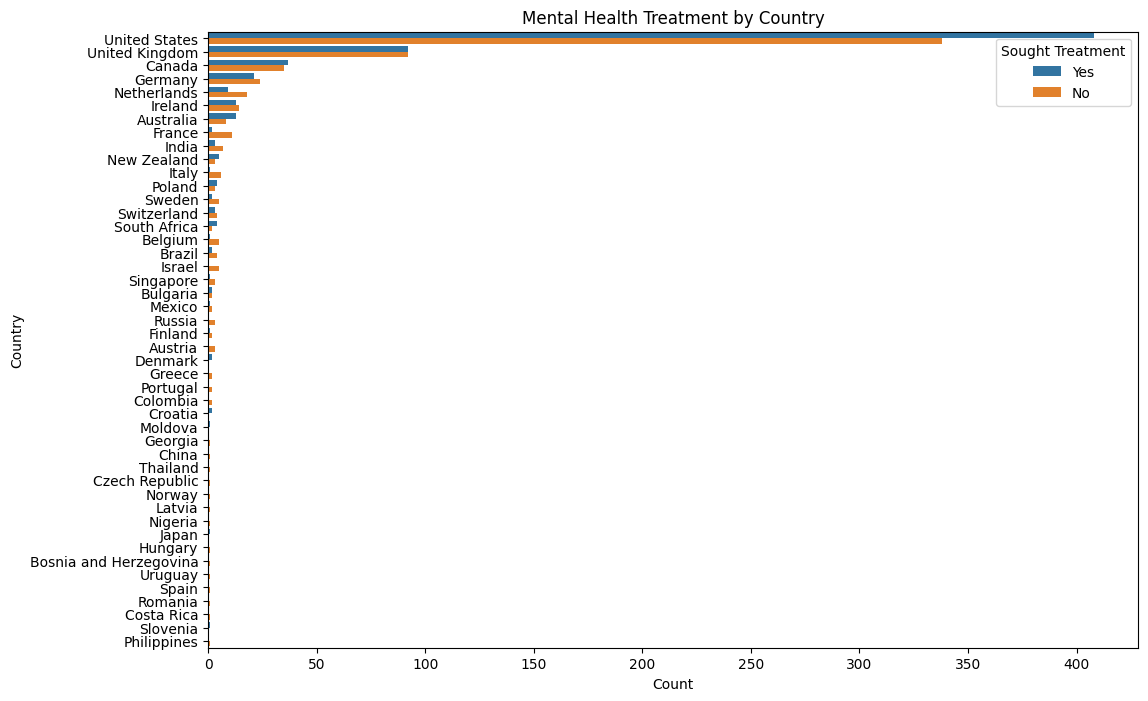

In [263]:
#treatment by country
plt.figure(figsize=(12, 8))
sns.countplot(data=mh, y='Country', order=mh['Country'].value_counts().index, hue='treatment')
plt.title('Mental Health Treatment by Country')
plt.xlabel('Count')
plt.ylabel('Country')
plt.legend(title='Sought Treatment', loc='upper right')
plt.show()


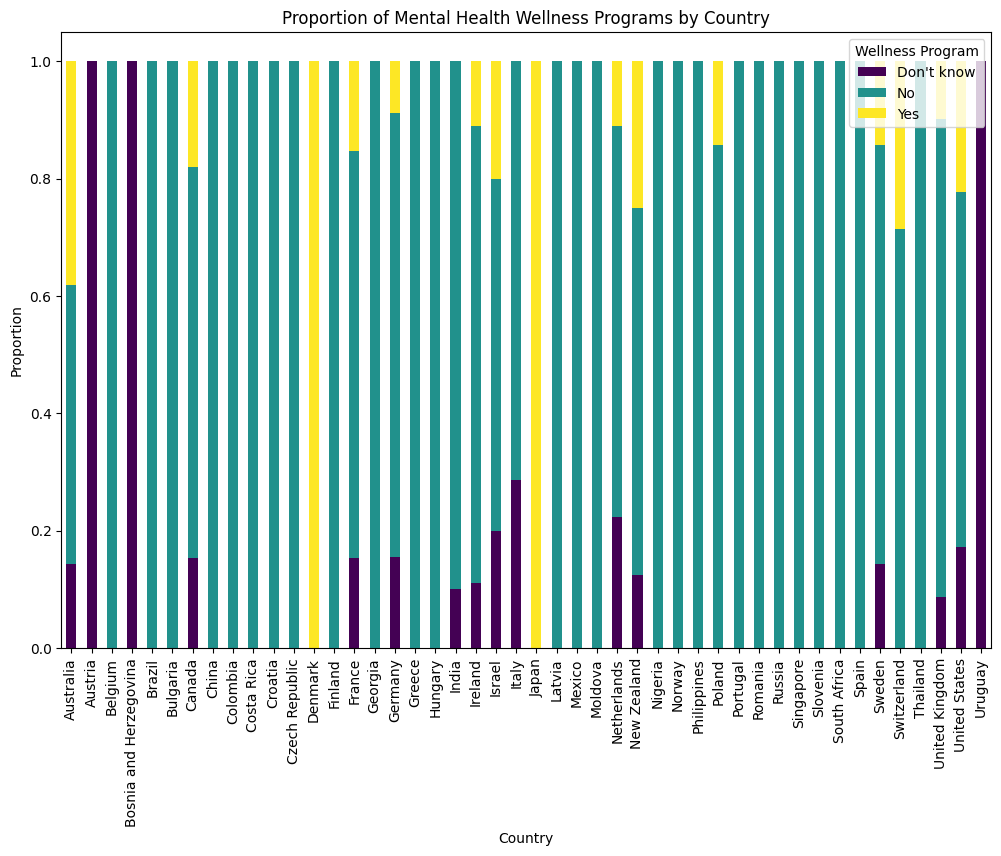

In [264]:
#wellness programs by country
country_wellness = mh.groupby('Country')['wellness_program'].value_counts(normalize=True).unstack()
country_wellness.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')
plt.title('Proportion of Mental Health Wellness Programs by Country')
plt.ylabel('Proportion')
plt.xlabel('Country')
plt.legend(title='Wellness Program', loc='upper right')
plt.show()


# K-Means clustering


In [265]:
#Preprocessing

mh = mh.drop(columns=['Timestamp', 'comments']) #problematic cols

mh = mh.fillna(mh.mode().iloc[0])  #fill missing values with most frequent

categorical_columns = ['Gender', 'Country', 'state', 'self_employed', 'family_history', 'work_interfere', 'no_employees',
                       'remote_work', 'tech_company', 'benefits', 'care_options', 'wellness_program', 'seek_help',
                       'anonymity', 'leave', 'mental_health_consequence', 'phys_health_consequence', 'coworkers',
                       'supervisor', 'mental_health_interview', 'phys_health_interview', 'mental_vs_physical', 'obs_consequence']

numeric_columns = ['Age']

#preprocessing pipeline for categorical and numeric features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_columns),
        ('cat', OneHotEncoder(), categorical_columns)
    ])

#transformations
X = preprocessor.fit_transform(mh)

#num clusters
k = 5

#fit k means
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)

#assign cluster labels
mh['Cluster'] = kmeans.labels_

#cluster centroids
print(f"Cluster Centers:\n{kmeans.cluster_centers_}")

print(mh[['Age', 'Gender', 'Country', 'Cluster']].head())  # You can adjust the columns you want to display

Cluster Centers:
[[ 1.57336509  0.15183246  0.84293194  0.0052356   0.0104712   0.
   0.          0.          0.          0.          0.0104712   0.
   0.          0.          0.          0.          0.          0.
   0.0052356   0.          0.0104712   0.          0.          0.
   0.0104712   0.          0.          0.0052356   0.          0.0052356
   0.          0.01570681  0.0104712   0.          0.          0.
   0.          0.          0.          0.          0.0052356   0.
   0.0052356   0.          0.          0.          0.          0.05235602
   0.85340314  0.          0.0052356   0.0052356   0.29319372  0.0052356
   0.0104712   0.0052356   0.02617801  0.01570681  0.01570681  0.0052356
   0.03141361  0.04188482  0.0104712   0.0052356   0.          0.03664921
   0.0104712   0.0052356   0.02617801  0.0104712   0.0052356   0.
   0.02094241  0.          0.0104712   0.0104712   0.          0.
   0.03141361  0.03141361  0.0052356   0.03664921  0.03664921  0.
   0.          0.     

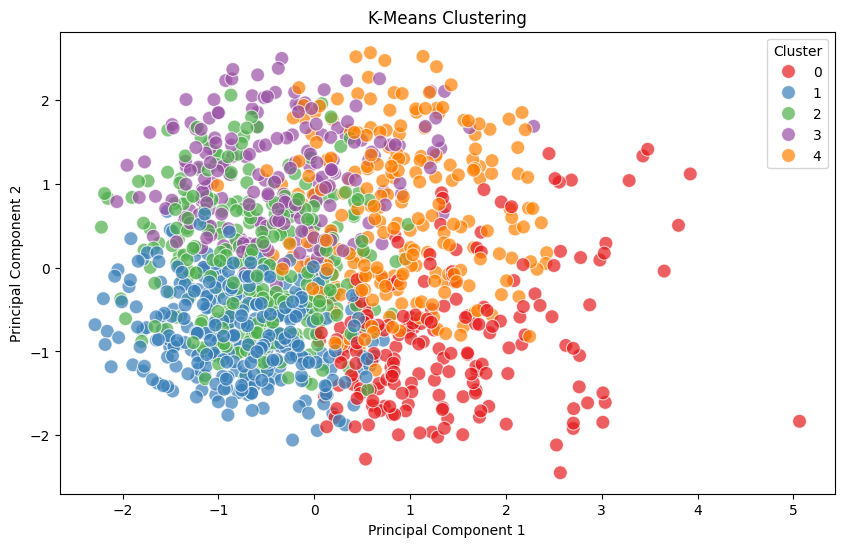

In [266]:
#use pca to reduce dim for vizualization
from sklearn.decomposition import PCA

#reduce to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

#plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=mh['Cluster'], palette='Set1', s=100, alpha=0.7)
plt.title('K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [267]:
kmeans.inertia_

13894.639085555204

In [268]:
silhouette_score(X, kmeans.labels_)

0.0531016914232299

In [269]:
#davies_bouldin_score(X, kmeans.labels_)

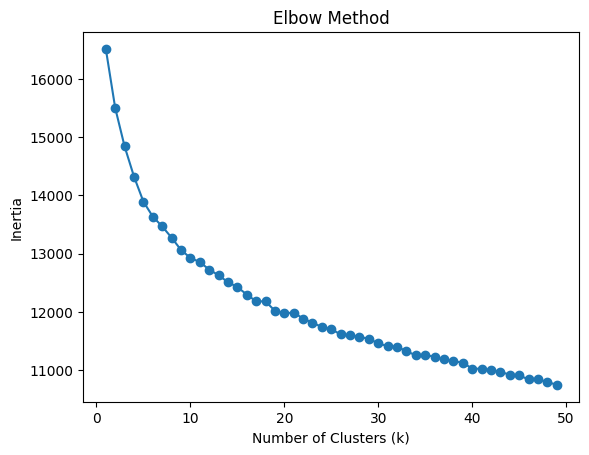

In [270]:
# Elbow method to determine the optimal number of clusters
inertia = []
for k in range(1, 50):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot inertia for different k values
plt.plot(range(1, 50), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

# Logistic Regression

In [271]:
#target seek_help
X = mh.drop(columns=['seek_help'])
y = mh['seek_help'].apply(lambda x: 1 if x == 'Yes' else 0)  #target to binary

#handle missing values
X = X.fillna(X.mode().iloc[0])

#identify cat cols
categorical_columns = X.select_dtypes(include=['object']).columns

#one-hot encode cat cols
X = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

#traintestsplit
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [272]:
#init and fit
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94       202
           1       0.84      0.63      0.72        49

    accuracy                           0.90       251
   macro avg       0.88      0.80      0.83       251
weighted avg       0.90      0.90      0.90       251

Confusion Matrix:
 [[196   6]
 [ 18  31]]


In [273]:
# Logistic Regression with hyperparameter tuning (C is the regularization strength)
model_tuned = LogisticRegression(class_weight='balanced', C=0.5, max_iter=1000)
model_tuned.fit(X_train, y_train)

y_pred_tuned = model_tuned.predict(X_test)

print("Tuned Classification Report:\n", classification_report(y_test, y_pred_tuned))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Tuned Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.87      0.91       202
           1       0.60      0.84      0.70        49

    accuracy                           0.86       251
   macro avg       0.78      0.85      0.80       251
weighted avg       0.89      0.86      0.87       251

Confusion Matrix:
 [[196   6]
 [ 18  31]]
